In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt



 Answer (a)-Loading datasets 

In [2]:
df=pd.read_excel("/content/train_small1.xls",parse_dates=['timestamp'])
df.head()

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
0,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,0,3.22,0.2544,5.98,21,295.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,0,2.71,NaN,5.64,36,299.0,0,12588,2,46,1,0,1,1,NaN,238.34,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,1,3.22,0.1924,6.10,22,373.0,1,12588,2,46,1,0,1,1,NaN,238.33,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,0,3.26,0.3729,5.74,4,329.0,0,12588,2,46,1,0,1,1,NaN,238.29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,0,3.09,0.2508,6.21,26,600.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [3]:
df.tail()

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
65530,18579,2012-12-10 20:05:23,32,220,NaN,NaN,220,24277,3,0.0,0,4.91,NaN,5.08,10,157.33,0,10757,2,31,2,2,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
65531,18579,2012-12-10 20:05:23,32,220,NaN,NaN,220,29677,4,2.5,0,5.06,0.4964,4.35,15,178.31,0,10757,2,31,2,2,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,-1.0,0.0,32.0,1.0,0.0,25.0,1.0,0.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
65532,18579,2012-12-10 20:05:23,32,220,NaN,NaN,220,36289,4,4.0,1,5.12,0.5027,5.11,21,320.96,1,10757,2,31,2,2,1,1,NaN,NaN,1,NaN,NaN,NaN,1.0,0.0,5.0,1.0,0.0,5.0,1.0,0.0,5.0,1.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
65533,18579,2012-12-10 20:05:23,32,220,NaN,NaN,220,50432,5,4.5,1,5.13,0.4491,5.80,6,267.46,1,10757,2,31,2,2,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
65534,18579,2012-12-10 20:05:23,32,220,NaN,NaN,220,61639,4,3.5,0,4.74,0.2889,5.17,4,172.02,0,10757,2,31,2,2,1,1,NaN,NaN,1,NaN,NaN,NaN,1.0,0.0,7.0,NaN,1.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [4]:
df.shape

(65535, 54)

In [5]:
df.columns

Index(['search_id', 'timestamp', 'site_id', 'user_country_id',
       'user_hist_stars', 'user_hist_paid', 'listing_country_id', 'listing_id',
       'listing_stars', 'listing_review_score', 'is_brand', 'location_score1',
       'location_score2', 'log_historical_price', 'listing_position',
       'price_usd', 'has_promotion', 'destination_id', 'length_of_stay',
       'booking_window', 'num_adults', 'num_kids', 'num_rooms',
       'stay_on_saturday', 'log_click_proportion', 'distance_to_dest',
       'random_sort', 'competitor1_rate', 'competitor1_has_availability',
       'competitor1_price_percent_diff', 'competitor2_rate',
       'competitor2_has_availability', 'competitor2_price_percent_diff',
       'competitor3_rate', 'competitor3_has_availability',
       'competitor3_price_percent_diff', 'competitor4_rate',
       'competitor4_has_availability', 'competitor4_price_percent_diff',
       'competitor5_rate', 'competitor5_has_availability',
       'competitor5_price_percent_diff',

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   search_id                       65535 non-null  int64         
 1   timestamp                       65535 non-null  datetime64[ns]
 2   site_id                         65535 non-null  int64         
 3   user_country_id                 65535 non-null  int64         
 4   user_hist_stars                 3672 non-null   float64       
 5   user_hist_paid                  3672 non-null   float64       
 6   listing_country_id              65535 non-null  int64         
 7   listing_id                      65535 non-null  int64         
 8   listing_stars                   65535 non-null  int64         
 9   listing_review_score            65456 non-null  float64       
 10  is_brand                        65535 non-null  int64         
 11  lo

In [7]:
miss_prect=df.isnull().sum()*100/len(df)
miss_prect

search_id                          0.000000
timestamp                          0.000000
site_id                            0.000000
user_country_id                    0.000000
user_hist_stars                   94.396887
user_hist_paid                    94.396887
listing_country_id                 0.000000
listing_id                         0.000000
listing_stars                      0.000000
listing_review_score               0.120546
is_brand                           0.000000
location_score1                    0.000000
location_score2                   20.682078
log_historical_price               0.000000
listing_position                   0.000000
price_usd                          0.000000
has_promotion                      0.000000
destination_id                     0.000000
length_of_stay                     0.000000
booking_window                     0.000000
num_adults                         0.000000
num_kids                           0.000000
num_rooms                       

In [8]:
# Adding new feature 
df['year']=df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month

In [93]:
imp_feature  = df[['booking_window', 'price_usd', 'num_rooms', 'stay_on_saturday','booked','year','month']]
imp_feature

,booking_window,price_usd,num_rooms,stay_on_saturday,booked,year,month
0,46,295.00,1,1,0,2012,12
1,46,299.00,1,1,0,2012,12
2,46,373.00,1,1,0,2012,12
3,46,329.00,1,1,0,2012,12
4,46,600.00,1,1,0,2012,12
...,...,...,...,...,...,...,...
65530,31,157.33,1,1,0,2012,12
65531,31,178.31,1,1,0,2012,12
65532,31,320.96,1,1,0,2012,12
65533,31,267.46,1,1,0,2012,12


(b) - summary statistics 

In [94]:
imp_feature.describe()

,booking_window,price_usd,num_rooms,stay_on_saturday,booked,year,month
count,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000
mean,37.227131,179.228433,1.113878,0.501610,0.027466,2012.789624,5.274693
std,51.551337,575.141175,0.418707,0.500001,0.163439,0.407579,3.558146
min,0.000000,1.370000,1.000000,0.000000,0.000000,2012.000000,1.000000
25%,4.000000,86.000000,1.000000,0.000000,0.000000,2013.000000,3.000000
50%,17.000000,124.000000,1.000000,1.000000,0.000000,2013.000000,4.000000
75%,48.000000,188.000000,1.000000,1.000000,0.000000,2013.000000,6.000000
max,359.000000,27372.000000,8.000000,1.000000,1.000000,2013.000000,12.000000


In [9]:
df.shape

(65535, 56)

In [10]:
df.drop(['timestamp','user_hist_stars','user_hist_paid'],axis=1,inplace=True)

**click-through rate **

In [89]:
df['clicked'].value_counts()

0    62572
1     2963
Name: clicked, dtype: int64

In [92]:
CTR=2963/62572
CTR*100

4.735344882695135

EDA

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


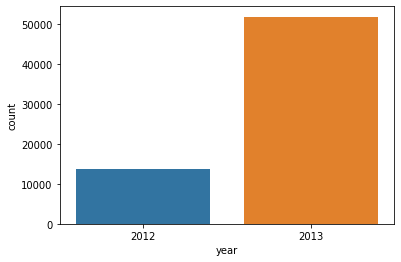

In [66]:
# Booking in which year?
sns.countplot('year',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


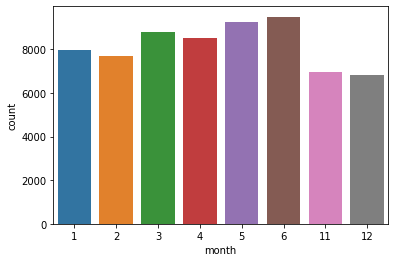

In [67]:
# Monthly counts 
sns.countplot('month',data=df)

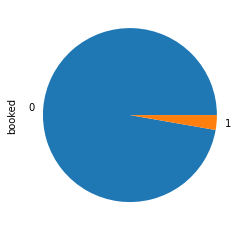

In [68]:
## Booked Room ?
# 1- Booked 
#0- Not booked 
df['booked'].value_counts().plot(kind='pie')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


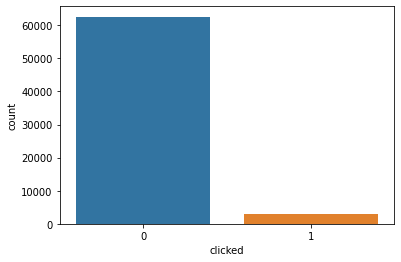

In [69]:
# Clicked on Ad 
# 1- Clicked 
# 0- Not clicked  
sns.countplot("clicked",data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


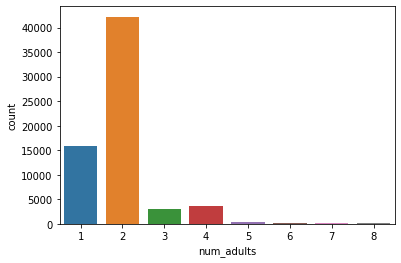

In [70]:
# Number of adults in Hotel room ?
sns.countplot("num_adults",data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


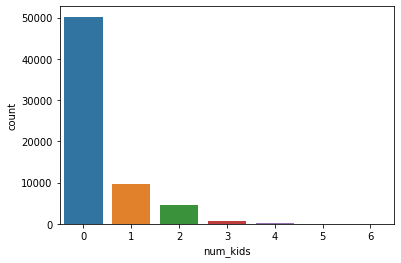

In [71]:
# Extra occupancy for children in hotel Room ?
sns.countplot('num_kids',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


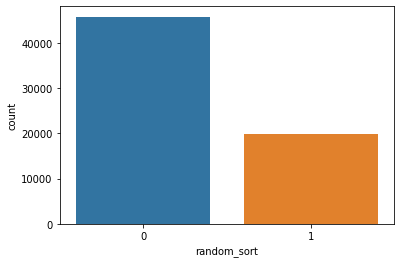

In [72]:
# normal sort order
sns.countplot("random_sort",data=df)

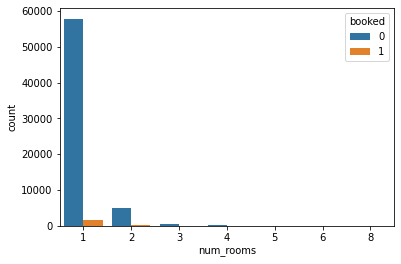

In [73]:
# Number of Hotel Romms booked ?
# # 1- Booked 
#0- Not booked 
sns.countplot(x='num_rooms',hue='booked',data=df)

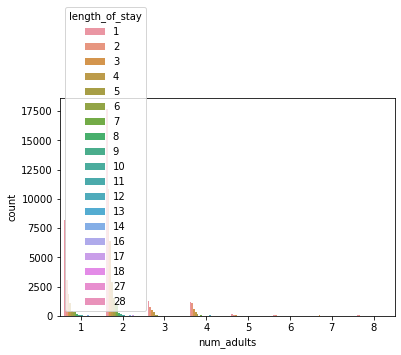

In [74]:
# Number of night was searched for adult  
sns.countplot(x='num_adults',hue='length_of_stay',data=df)

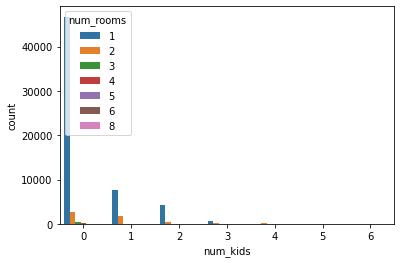

In [75]:
# Extra rooms for kids ?
sns.countplot(x='num_kids',hue='num_rooms',data=df)

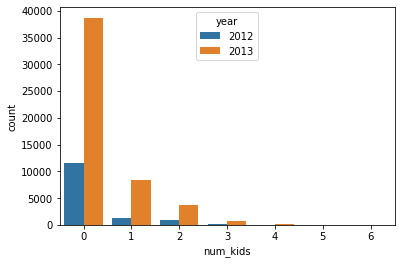

In [76]:
# which year room search for kids ?
sns.countplot(x='num_kids',hue='year',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


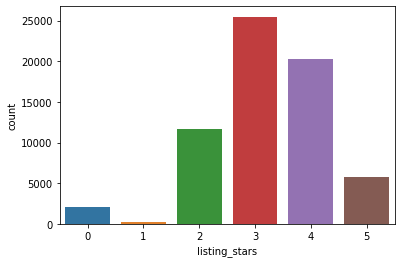

In [77]:
# Hotel room searched by stars
sns.countplot('listing_stars',data=df)

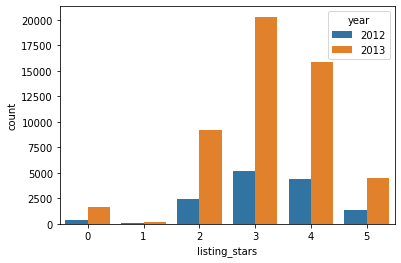

In [78]:
# Maximum number searched by stars review 
sns.countplot(x='listing_stars',hue='year',data=df)

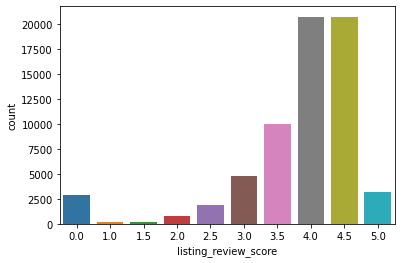

In [79]:
# Maximum star reating 
sns.countplot(x='listing_review_score',data=df)

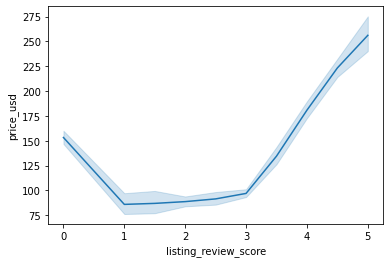

In [80]:
# Impact of star ratings on hotel room prices 
sns.lineplot( x=df["listing_review_score"], y=df["price_usd"])

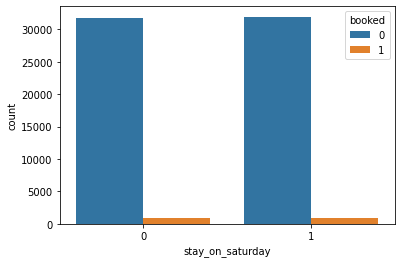

In [81]:
# Number of room booked for sturday 
sns.countplot(x='stay_on_saturday',hue='booked',data=df)

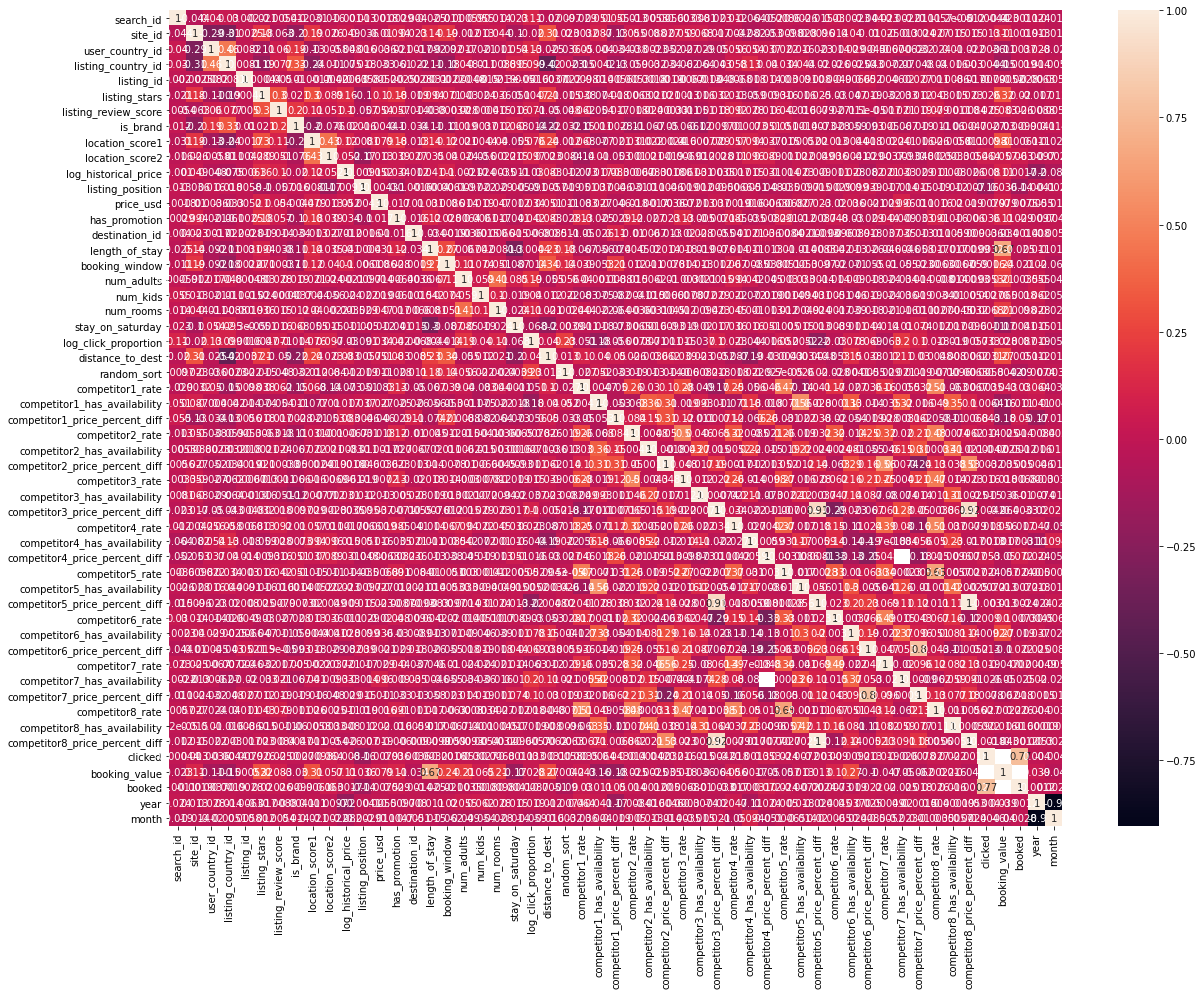

In [39]:
# Corelation 
corr_hmap=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Dealing with Null values of datasets

In [82]:
# Making a new datasets which having less then 80% null values 
DF=df.loc[:,df.isnull().sum()<0.8*df.shape[0]]
DF

,search_id,site_id,user_country_id,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,distance_to_dest,random_sort,competitor2_rate,competitor2_has_availability,competitor3_rate,competitor3_has_availability,competitor5_rate,competitor5_has_availability,competitor8_rate,competitor8_has_availability,clicked,booked,year,month
0,4,5,219,219,3625,4,4.0,0,3.22,0.2544,5.98,21,295.00,0,12588,2,46,1,0,1,1,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2012,12
1,4,5,219,219,11622,4,4.0,0,2.71,NaN,5.64,36,299.00,0,12588,2,46,1,0,1,1,238.34,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2012,12
2,4,5,219,219,11826,5,4.5,1,3.22,0.1924,6.10,22,373.00,1,12588,2,46,1,0,1,1,238.33,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2012,12
3,4,5,219,219,22824,3,4.0,0,3.26,0.3729,5.74,4,329.00,0,12588,2,46,1,0,1,1,238.29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2012,12
4,4,5,219,219,37581,5,4.5,0,3.09,0.2508,6.21,26,600.00,0,12588,2,46,1,0,1,1,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2012,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,18579,32,220,220,24277,3,0.0,0,4.91,NaN,5.08,10,157.33,0,10757,2,31,2,2,1,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2012,12
65531,18579,32,220,220,29677,4,2.5,0,5.06,0.4964,4.35,15,178.31,0,10757,2,31,2,2,1,1,NaN,1,0.0,0.0,-1.0,0.0,1.0,0.0,NaN,NaN,0,0,2012,12
65532,18579,32,220,220,36289,4,4.0,1,5.12,0.5027,5.11,21,320.96,1,10757,2,31,2,2,1,1,NaN,1,1.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,0,0,2012,12
65533,18579,32,220,220,50432,5,4.5,1,5.13,0.4491,5.80,6,267.46,1,10757,2,31,2,2,1,1,NaN,1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,2012,12


In [83]:
miss_percentage1=DF.isnull().sum()*100/len(DF)
print(miss_percentage1)

search_id                        0.000000
site_id                          0.000000
user_country_id                  0.000000
listing_country_id               0.000000
listing_id                       0.000000
listing_stars                    0.000000
listing_review_score             0.120546
is_brand                         0.000000
location_score1                  0.000000
location_score2                 20.682078
log_historical_price             0.000000
listing_position                 0.000000
price_usd                        0.000000
has_promotion                    0.000000
destination_id                   0.000000
length_of_stay                   0.000000
booking_window                   0.000000
num_adults                       0.000000
num_kids                         0.000000
num_rooms                        0.000000
stay_on_saturday                 0.000000
distance_to_dest                33.617151
random_sort                      0.000000
competitor2_rate                59

In [84]:
# To deal with null values , Using backfill method 
df1=DF.fillna(method="bfill")

In [85]:
df1.fillna(df1.mean(), inplace=True)

In [43]:
df1.isnull().sum()

search_id                       0
site_id                         0
user_country_id                 0
listing_country_id              0
listing_id                      0
listing_stars                   0
listing_review_score            0
is_brand                        0
location_score1                 0
location_score2                 0
log_historical_price            0
listing_position                0
price_usd                       0
has_promotion                   0
destination_id                  0
length_of_stay                  0
booking_window                  0
num_adults                      0
num_kids                        0
num_rooms                       0
stay_on_saturday                0
distance_to_dest                0
random_sort                     0
competitor2_rate                0
competitor2_has_availability    0
competitor3_rate                0
competitor3_has_availability    0
competitor5_rate                0
competitor5_has_availability    0
competitor8_ra

In [44]:
# splitinng the data x, and Y
x=df1.drop('clicked',axis=1)
y=df1.clicked

In [45]:
# Checking Multicolinerity in independent varible  with  VIf(Variance inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [46]:
# VIf(Variance inflation Factor) Values shows we have almost every attribute having multicolineartity.
# 0 & 1 - No correlation between independent variable 
# 5 to 10 - Moderate correlation 
# Above 10 - High correation
calc_vif(x)

,variables,VIF
0,search_id,4.033612
1,site_id,3.290295
2,user_country_id,10.723106
3,listing_country_id,11.298256
4,listing_id,4.023051
5,listing_stars,13.747249
6,listing_review_score,17.240275
7,is_brand,3.459255
8,location_score1,6.003356
9,location_score2,1.925137


In [86]:

# High VIF means High correlation , Using PCA to fix Multicolinrity Issue 
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
x=pca.fit_transform(x)
X=pd.DataFrame(data=x)

In [87]:
X.shape

(65535, 10)

In [88]:
# Checking VIF again 
calc_vif(X)

,variables,VIF
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0
6,6,1.0
7,7,1.0
8,8,1.0
9,9,1.0


In [50]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [51]:
X,Y=smote.fit_sample(x,y)
from collections import Counter
print('b_y', Counter(y))
print("a_y",Counter(Y))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


b_y Counter({0: 62572, 1: 2963})
a_y Counter({0: 62572, 1: 62572})


In [52]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(87600, 34) (37544, 34)
(87600,) (37544,)


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
KNN=KNeighborsClassifier()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()
RF = RandomForestClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()

In [60]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('RandomForestClassifier',RF))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('AdaBoostClassifier',ABC))
models.append(('GradientBoostingClassifier',GBC))


In [61]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

****************************** KNeighborsClassifier ********************************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score= 0.8467398252716812


cross_val_score= 0.6971888384580962


roc_auc_score= 0.8467398252716812


classification_report
               precision    recall  f1-score   support

           0       0.95      0.73      0.83     18772
           1       0.78      0.96      0.86     18772

    accuracy                           0.85     37544
   macro avg       0.87      0.85      0.84     37544
weighted avg       0.87      0.85      0.84     37544



[[13679  5093]
 [  661 18111]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************** RandomForestClassifier ********************************************


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=No

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score= 0.6740091625825698




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


cross_val_score= 0.6200616889343475


roc_auc_score= 0.6740091625825699


classification_report
               precision    recall  f1-score   support

           0       0.70      0.61      0.65     18772
           1       0.65      0.74      0.69     18772

    accuracy                           0.67     37544
   macro avg       0.68      0.67      0.67     37544
weighted avg       0.68      0.67      0.67     37544



[[11461  7311]
 [ 4928 13844]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************** DecisionTreeClassifier ********************************************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       ran

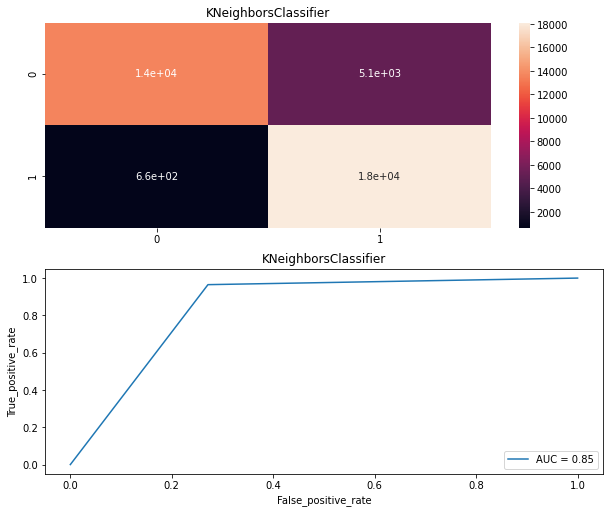

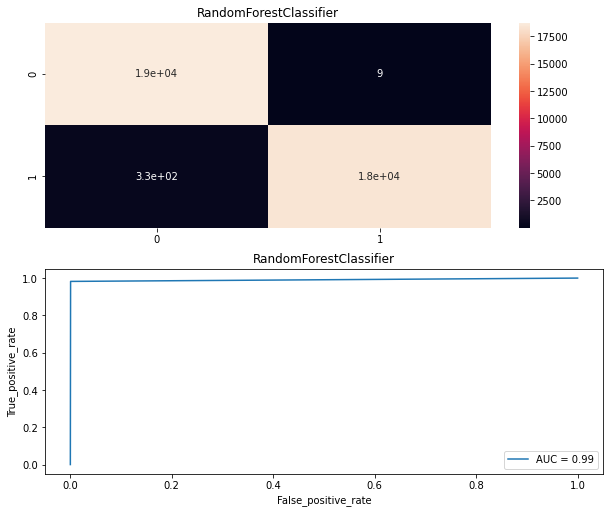

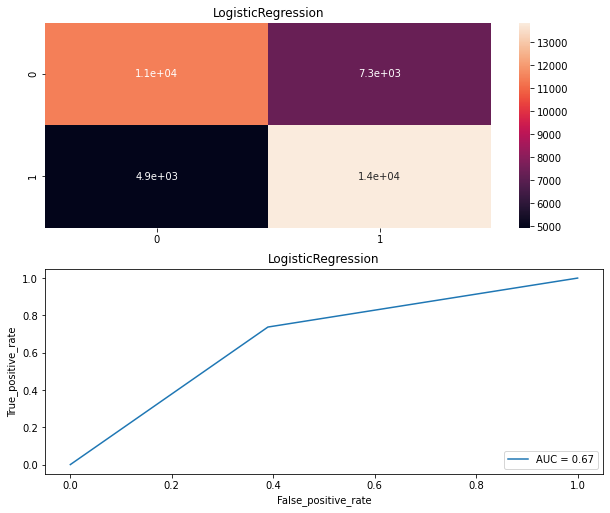

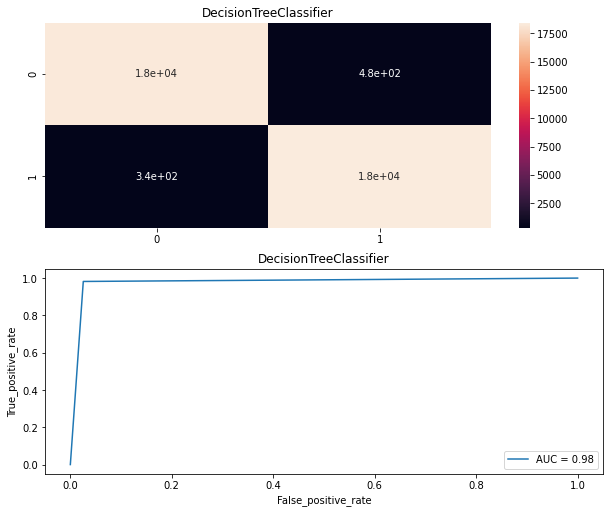

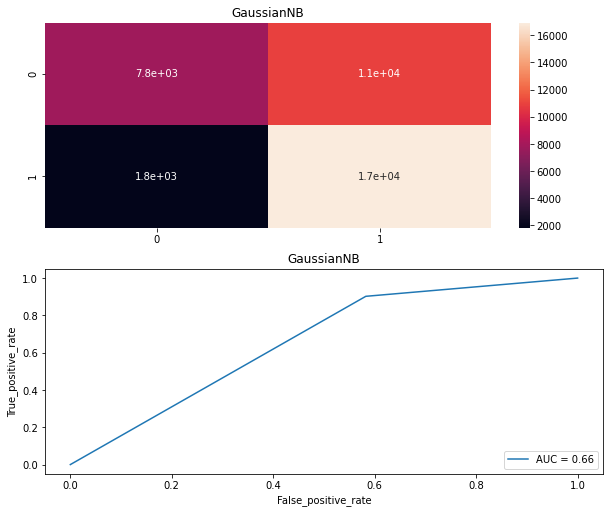

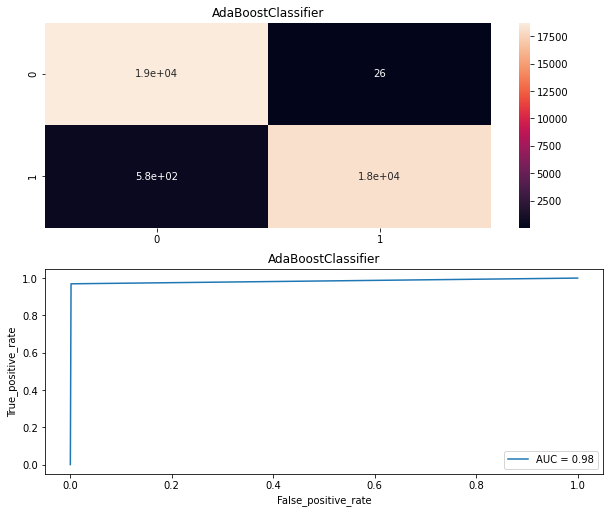

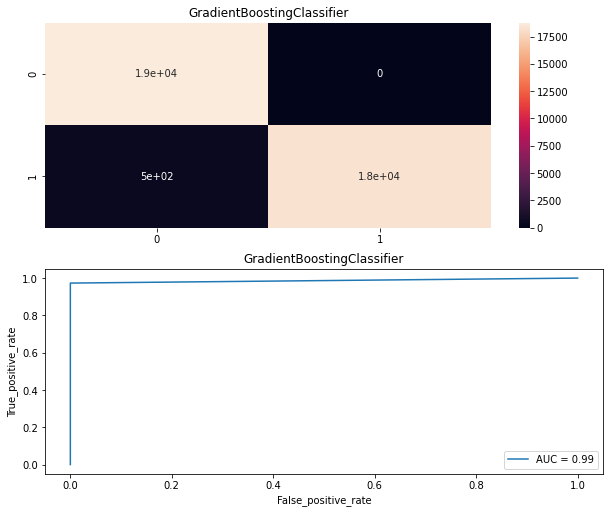

In [62]:
Model = []
score = []
cvs = []
rocscore=[]
for name,model in models:
    print('******************************',name,'********************************************')
    print('\n')
    Model.append(name)
    model.fit(X_train,Y_train)
    print(model)
    pre=model.predict(X_test)
    print('\n')
    AS=accuracy_score(Y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,X,Y,cv=8,scoring='accuracy').mean()
    print("cross_val_score=",sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test,pre)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(Y_test,pre))
    print('\n')
    cm=confusion_matrix(Y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [63]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cvs,'ROC_AUC_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,ROC_AUC_curve
0,KNeighborsClassifier,84.673983,69.718884,84.673983
1,RandomForestClassifier,99.086405,87.150802,99.086405
2,LogisticRegression,67.400916,62.006169,67.400916
3,DecisionTreeClassifier,97.821223,76.730007,97.821223
4,GaussianNB,65.989239,64.214825,65.989239
5,AdaBoostClassifier,98.396548,85.016461,98.396548
6,GradientBoostingClassifier,98.660239,89.041424,98.660239


saving RandomForest model because it perform good. Its ROC_AUC curve is arround 99% 

In [97]:
from sklearn.externals import joblib
joblib.dump(RF,'PROJECT1.pkl')
model1=joblib.load('PROJECT1.pkl')
model1.predict(X_test)

array([0, 1, 1, ..., 1, 1, 0])